In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 
import joblib

In [36]:
# Dropping categorical columns and choosing the columns with good correlation with our Y (Total cup points)
df = pd.read_csv("arabica_coffee_cupping_scores.csv")
features = [ "Aroma", 
    "Acidity",
    "Body",
    "Uniformity",
    "Clean Cup",
    "Sweetness",
    ]
target = "Total Cup Points"
X = df[features]
y = df[target]
print (X)
print(y)


      Aroma  Acidity  Body  Uniformity  Clean Cup  Sweetness
0      8.58     8.58  8.25       10.00      10.00      10.00
1      7.67     7.67  7.83       10.00      10.00      10.00
2      7.67     7.58  7.67       10.00      10.00      10.00
3      7.83     7.58  7.67       10.00      10.00      10.00
4      7.67     7.75  7.67       10.00      10.00      10.00
...     ...      ...   ...         ...        ...        ...
1504   7.08     7.42  7.25       10.00       0.00      10.00
1505   6.75     6.67  7.08        9.33       6.00       6.00
1506   7.25     6.25  6.42        6.00       6.00       6.00
1507   7.50     7.67  7.33        8.00       1.33       1.33
1508   0.00     0.00  0.00        0.00       0.00       0.00

[1509 rows x 6 columns]
0       89.33
1       83.75
2       83.75
3       83.67
4       83.67
        ...  
1504    68.33
1505    67.92
1506    63.08
1507    59.83
1508     0.00
Name: Total Cup Points, Length: 1509, dtype: float64


In [37]:
# splitting data to test and train data and scaling them to have the same scale 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
# creating a linearRegression Model
reg= LinearRegression()
reg.fit(X_train, y_train)
print (reg.coef_,reg.intercept_)


[2.25049973 2.42449196 2.29648289 1.09375192 1.23243675 0.90070467] -2.2083284426725243


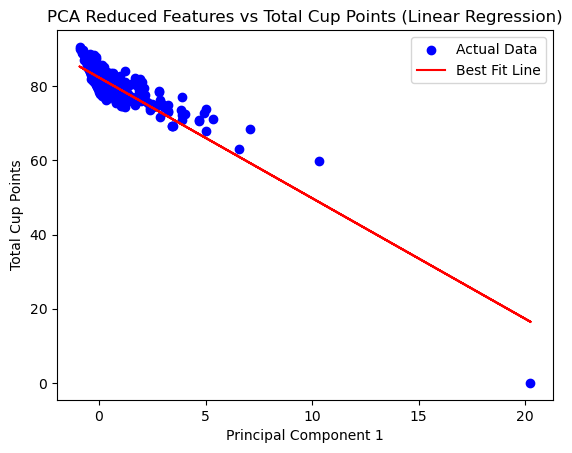

In [39]:
# plotting the best fit line from the trained linear regression model using the reduced features with PCA to plot the scatter plot
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  
X_pca = pca.fit_transform(X)
reg_pca= LinearRegression()
reg_pca.fit(X_pca, y)
y_pred_pca = reg_pca.predict(X_pca)
plt.scatter(X_pca, y, color="blue", label="Actual Data")
plt.plot(X_pca, y_pred_pca, color="red", label="Best Fit Line")
plt.xlabel("Principal Component 1")
plt.ylabel("Total Cup Points")
plt.title("PCA Reduced Features vs Total Cup Points (Linear Regression)")
plt.legend()
plt.show()

In [40]:
y_train_pred =reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate MSE for training and test data
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)
score=reg.score(X_test, y_test)

print(train_loss)
print(test_loss)
print(score)


0.390560652594123
0.43212190833879627
0.9383491089308562


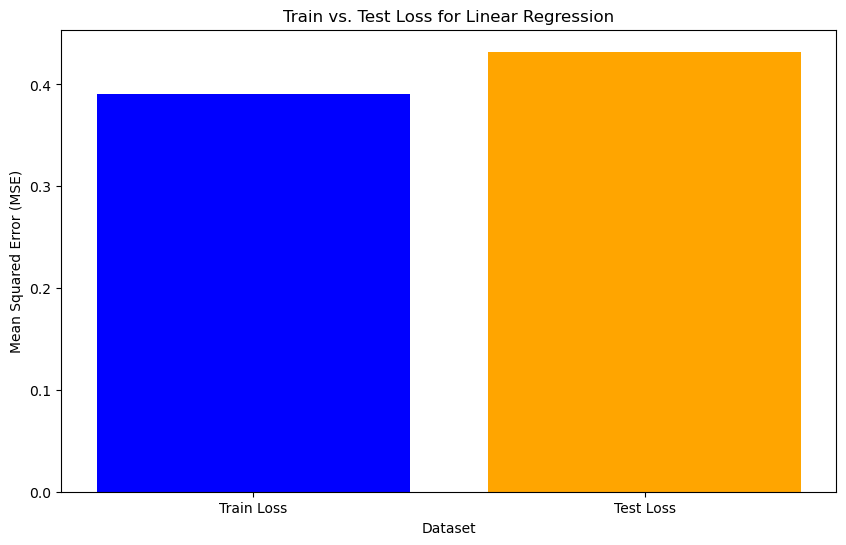

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=["blue", "orange"])
plt.xlabel("Dataset")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Train vs. Test Loss for Linear Regression")
plt.show()

In [42]:

# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred_tree = tree_reg.predict(X_train)
y_test_pred_tree = tree_reg.predict(X_test)
tree_train_loss = mean_squared_error(y_train, y_train_pred_tree)
tree_test_loss = mean_squared_error(y_test, y_test_pred_tree)

# Random Forest
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_train_pred_forest = forest_reg.predict(X_train)
y_test_pred_forest = forest_reg.predict(X_test)
forest_train_loss = mean_squared_error(y_train, y_train_pred_forest)
forest_test_loss = mean_squared_error(y_test, y_test_pred_forest)

# Print results
print("Linear Regression - Train Loss:", train_loss, "Test Loss:", test_loss)
print("Decision Tree - Train Loss:", tree_train_loss, "Test Loss:", tree_test_loss)
print("Random Forest - Train Loss:", forest_train_loss, "Test Loss:", forest_test_loss)

Linear Regression - Train Loss: 0.390560652594123 Test Loss: 0.43212190833879627
Decision Tree - Train Loss: 0.06627934722416495 Test Loss: 1.1319590083307054
Random Forest - Train Loss: 0.7864584502759907 Test Loss: 0.6564080219822898


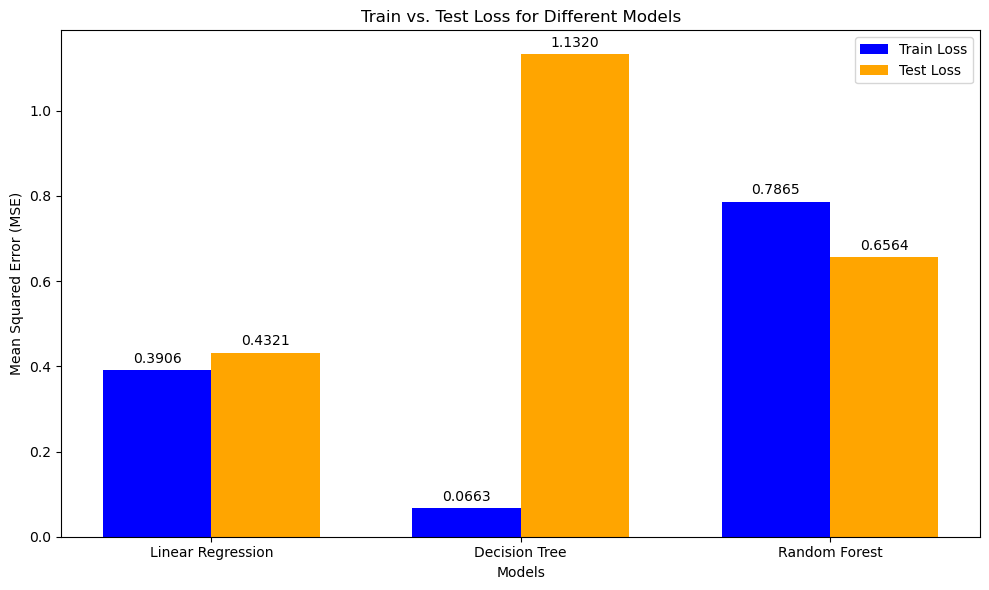

In [43]:
import matplotlib.pyplot as plt
import numpy as np
models = ["Linear Regression", "Decision Tree", "Random Forest"]
train_losses = [train_loss, tree_train_loss, forest_train_loss]
test_losses = [test_loss, tree_test_loss, forest_test_loss]
x = np.arange(len(models)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, train_losses, width, label="Train Loss", color="blue")

rects2 = ax.bar(x + width/2, test_losses, width, label="Test Loss", color="orange")

ax.set_xlabel("Models")
ax.set_ylabel("Mean Squared Error (MSE)")
ax.set_title("Train vs. Test Loss for Different Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.4f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [44]:

# trial with some data
data = {
    "Aroma": [7.25],
    "Acidity": [7.17],
    "Body": [7.33],
    "Uniformity": [9.33],
    "Clean Cup": [10],
    "Sweetness": [10],
    
   
}
input_df = pd.DataFrame(data)
# Create a DataFrame
reg.predict(input_df)

array([79.860741])

In [45]:

best_model = None
best_loss = float('inf')

models = {
    "Linear Regression": reg,
    "Decision Tree": tree_reg,
    "Random Forest": forest_reg
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_loss:
        best_model = model
        best_loss = mse

joblib.dump(best_model, "best_model.joblib.")
print(f"Best model saved: {type(best_model).__name__} with Test Loss: {best_loss}")

Best model saved: LinearRegression with Test Loss: 0.43212190833879627
